In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [9]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [11]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [12]:
churn_data_encoded = Gender_dummies

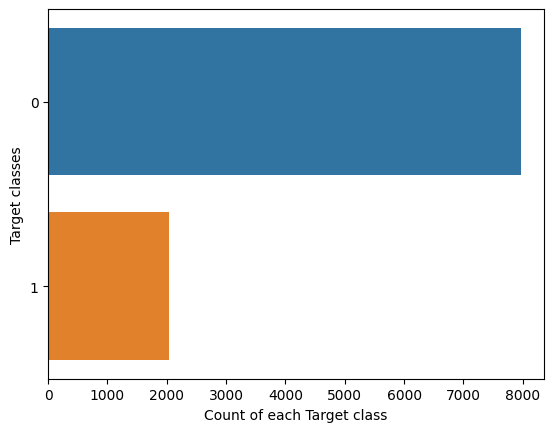

In [13]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

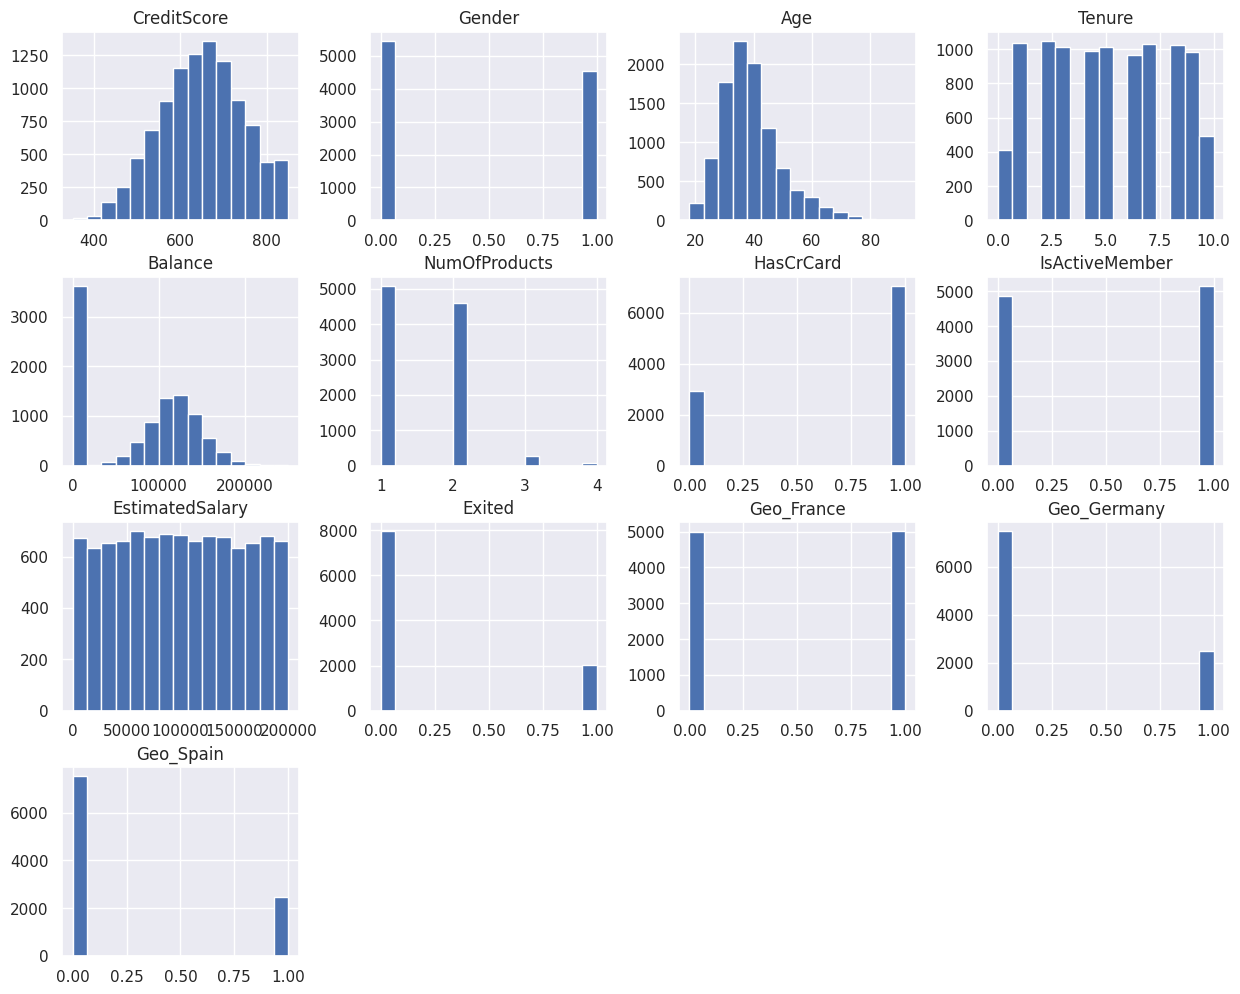

In [ ]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()


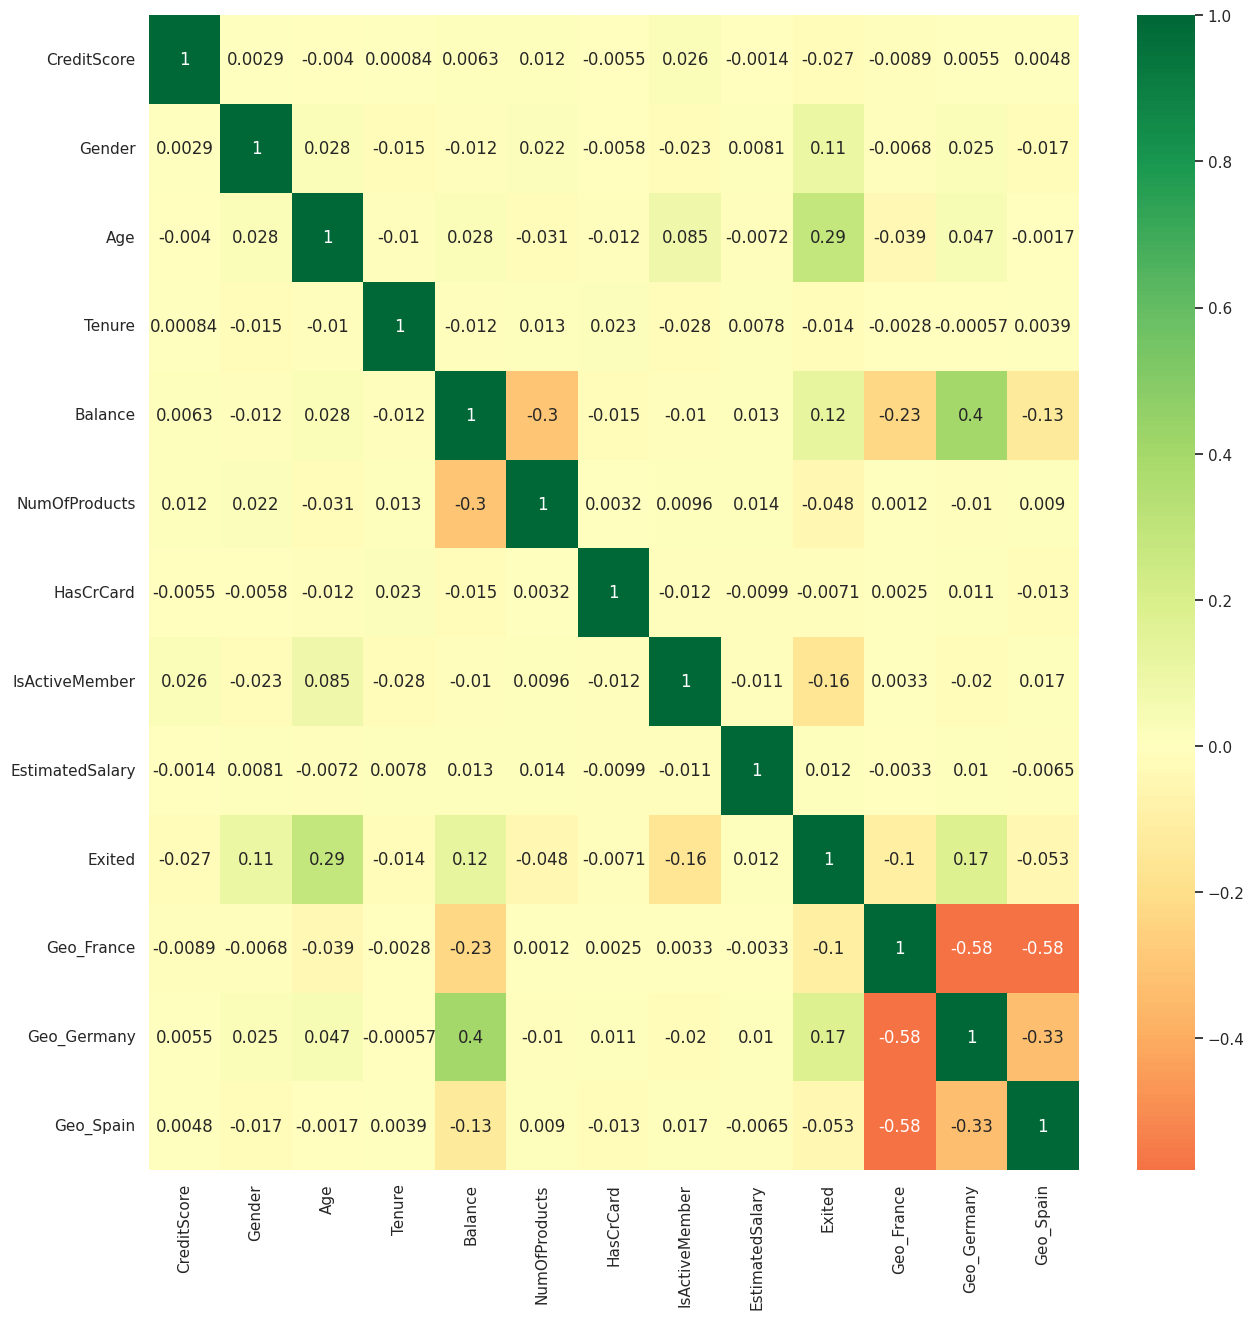

In [ ]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0)

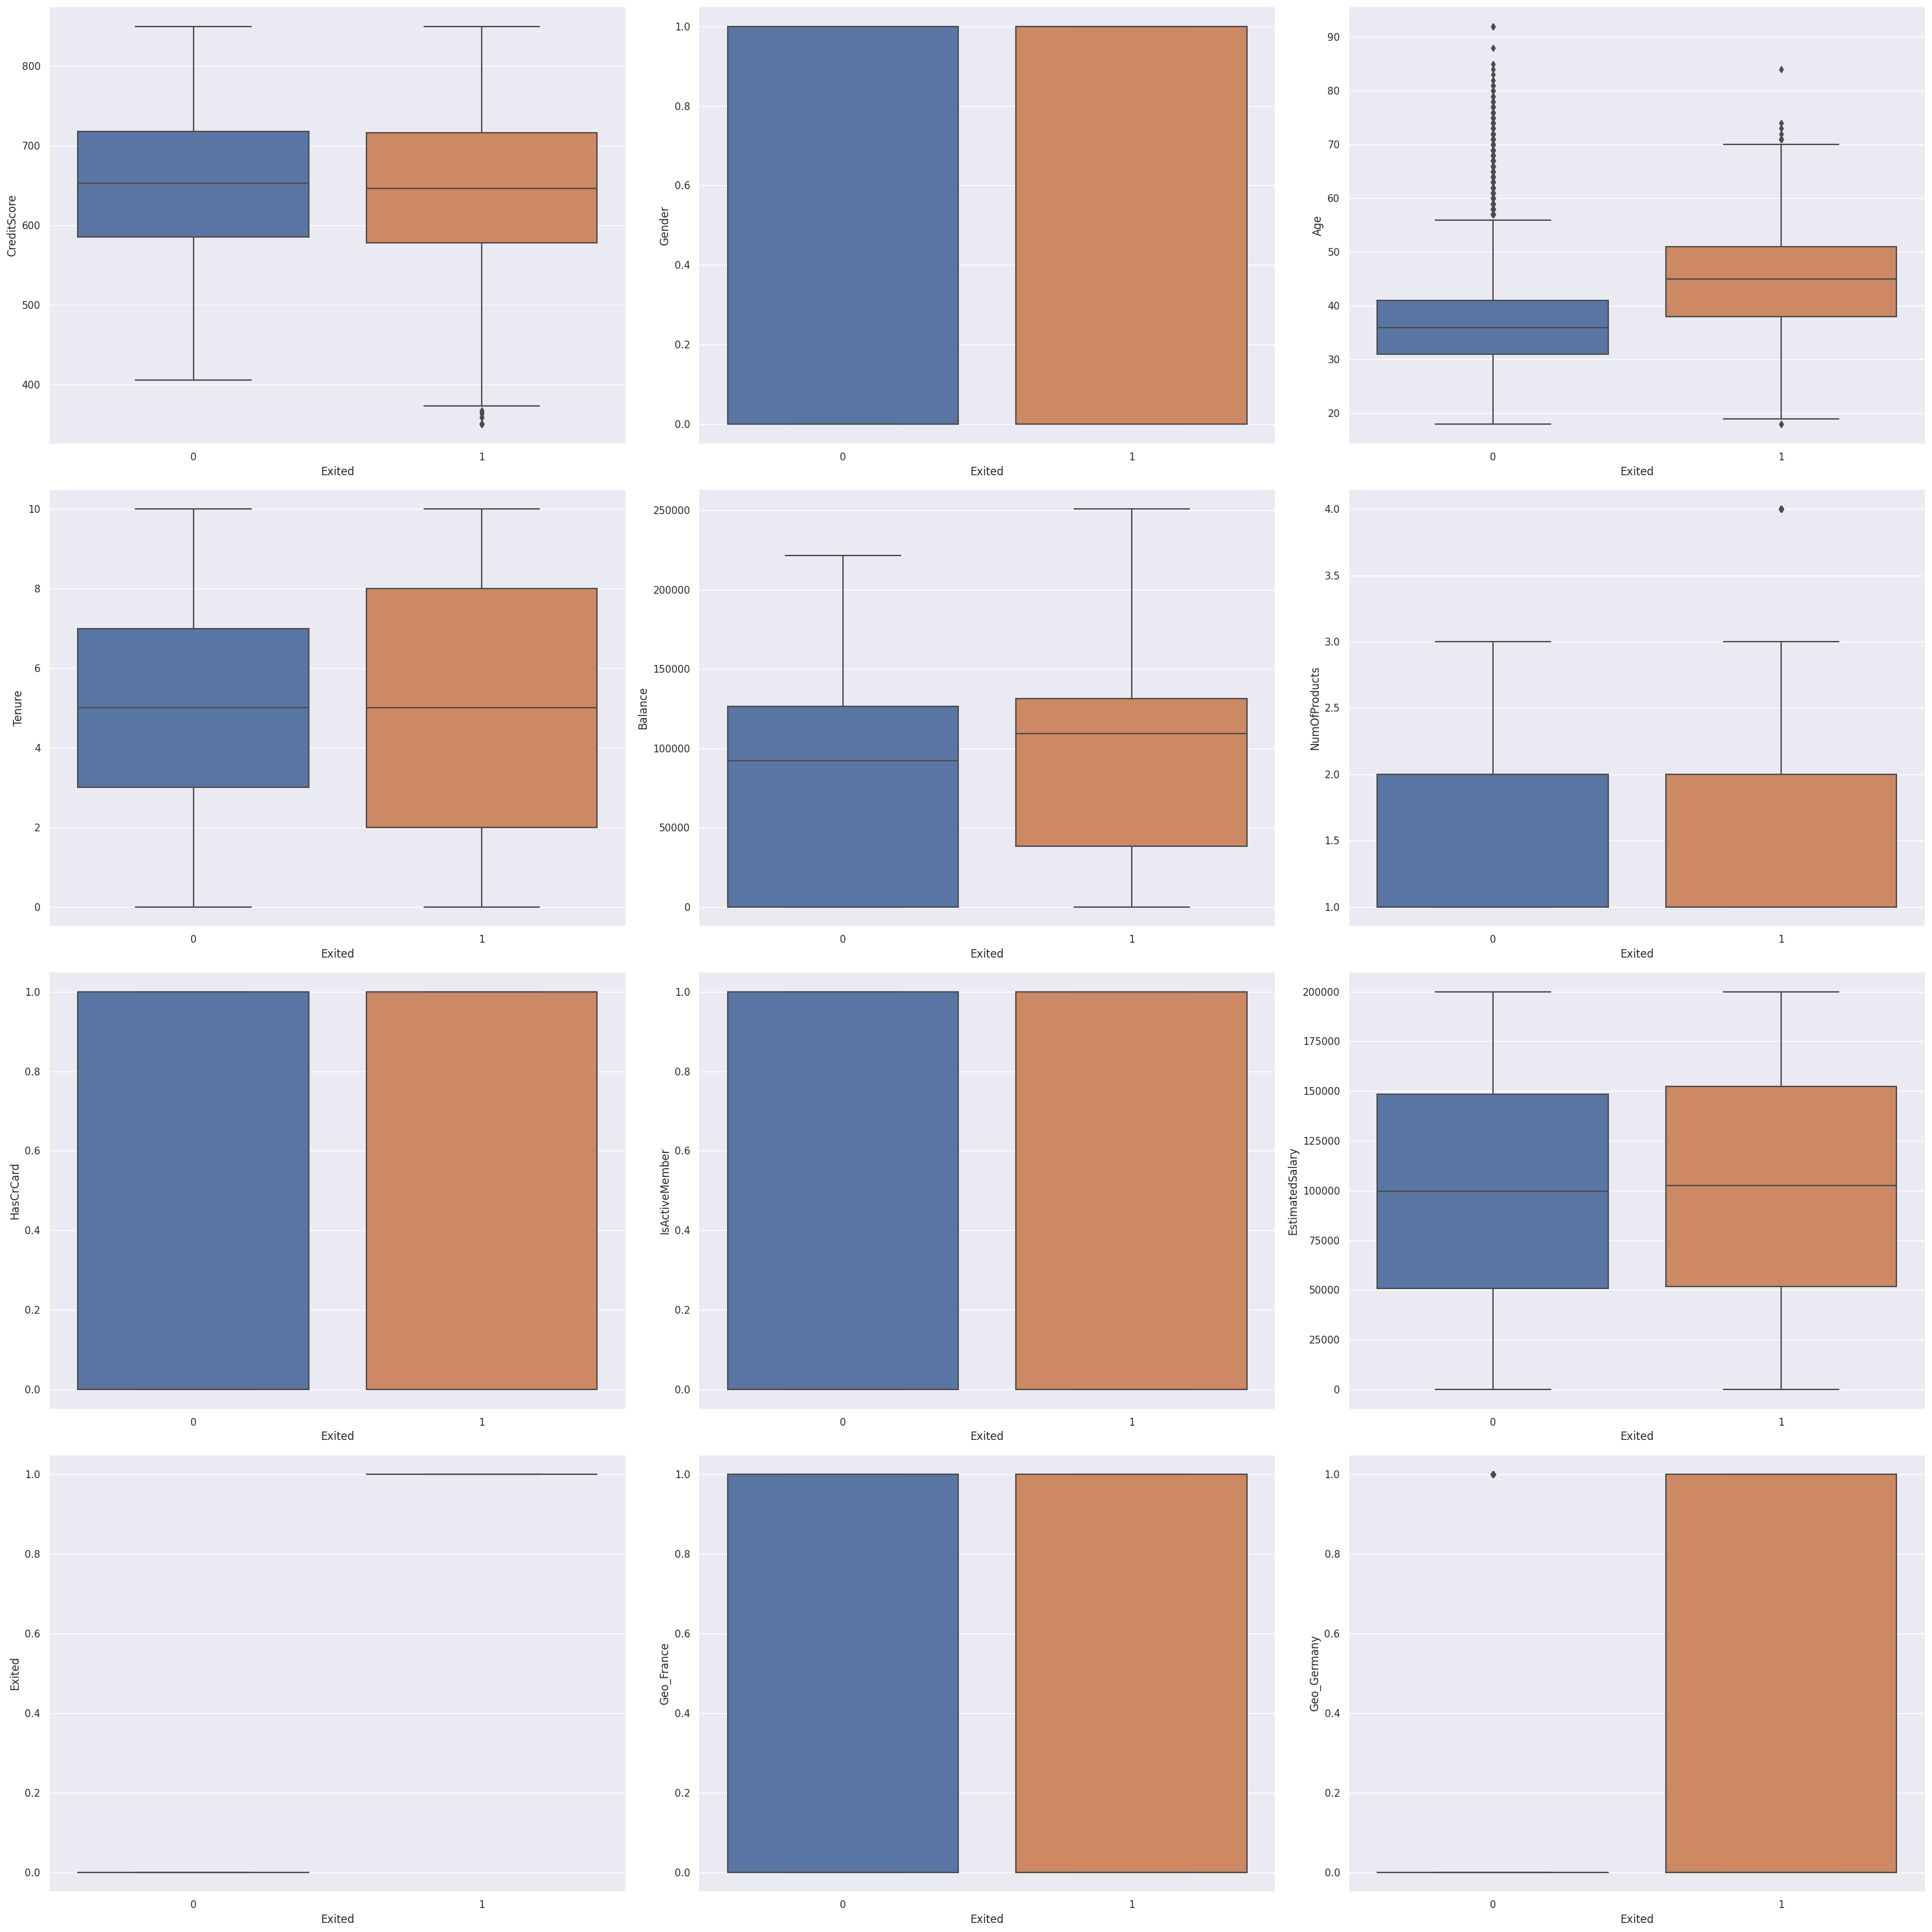

In [ ]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()


In [ ]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [ ]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1
7,822,0,50,7,0.00,2,1,1,10062.80,1,0,0
8,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0
9,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

670/670 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8378
Train score: 0.390869140625
Train accuracy: 0.8377612233161926
104/104 [==============================] - 0s 1ms/step
********************
330/330 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8418
Test score: 0.39931726455688477
Test accuracy: 0.8418181538581848


Text(0.5, 19.049999999999997, 'Predicted label')

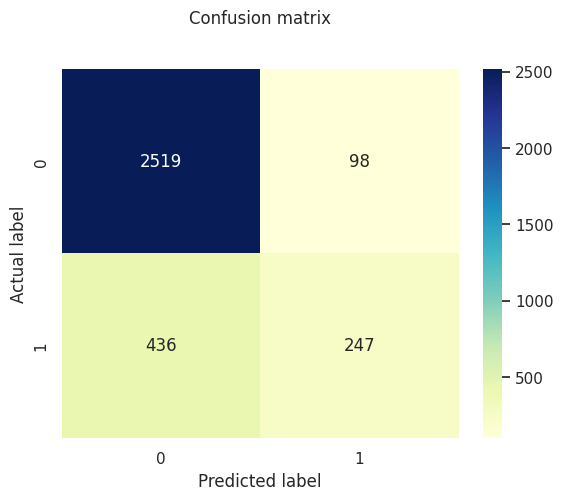

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2617
           1       0.72      0.36      0.48       683

    accuracy                           0.84      3300
   macro avg       0.78      0.66      0.69      3300
weighted avg       0.82      0.84      0.82      3300

